<a href="https://colab.research.google.com/github/sundarbee/PythonWorkout/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [22]:
train = pd.read_csv('Titanic-Dataset.csv')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: ylabel='count'>

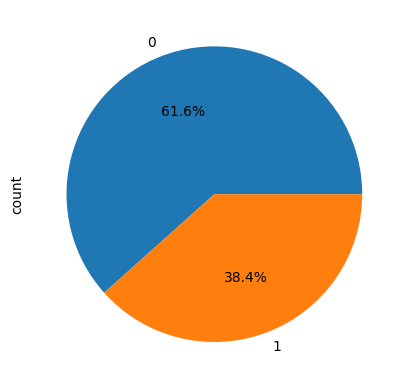

In [26]:
train.Survived.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

<Axes: xlabel='Survived', ylabel='count'>

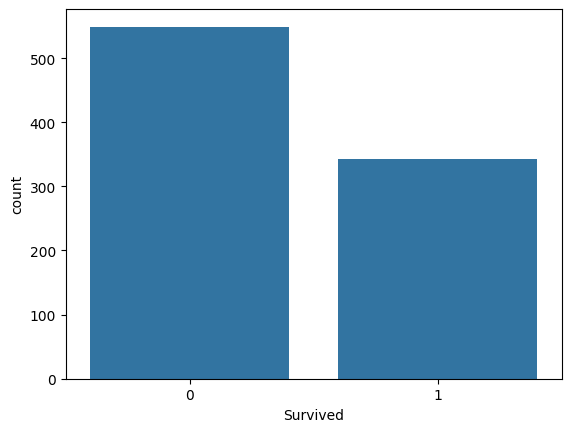

In [27]:
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Age', ylabel='Pclass'>

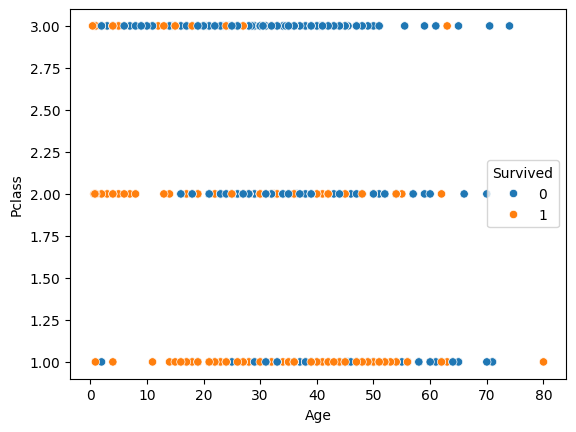

In [28]:
sns.scatterplot(x='Age',y='Pclass',data=train, hue = 'Survived')

<Axes: xlabel='Age', ylabel='Sex'>

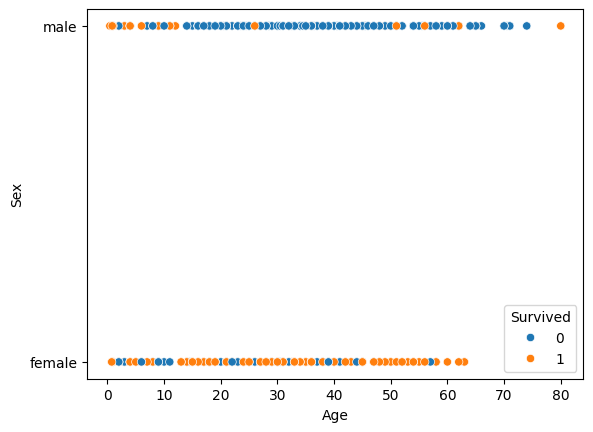

In [29]:
sns.scatterplot(x='Age',y='Sex',data=train, hue = 'Survived')

<Axes: xlabel='Age', ylabel='SibSp'>

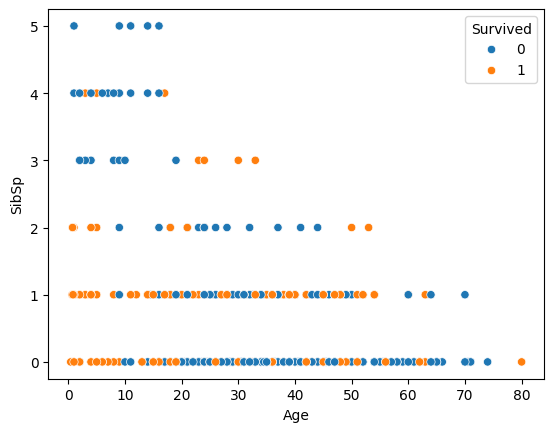

In [30]:
sns.scatterplot(x='Age',y='SibSp',data=train, hue = 'Survived')

<Axes: xlabel='Age', ylabel='Parch'>

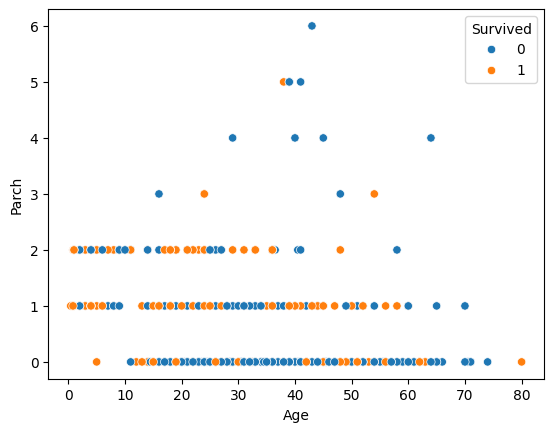

In [31]:
sns.scatterplot(x='Age',y='Parch',data=train, hue = 'Survived')

In [32]:
train.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [33]:
train.groupby('Pclass')['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [34]:
grouped = train.groupby(['Sex', 'Pclass','Embarked'])['Survived'].value_counts(normalize=True)

In [35]:
grouped

Sex     Pclass  Embarked  Survived
female  1       C         1           0.976744
                          0           0.023256
                Q         1           1.000000
                S         1           0.958333
                          0           0.041667
        2       C         1           1.000000
                Q         1           1.000000
                S         1           0.910448
                          0           0.089552
        3       C         1           0.652174
                          0           0.347826
                Q         1           0.727273
                          0           0.272727
                S         0           0.625000
                          1           0.375000
male    1       C         0           0.595238
                          1           0.404762
                Q         0           1.000000
                S         0           0.645570
                          1           0.354430
        2       C         0           0.800000
                          1           0.200000
                Q         0           1.000000
                S         0           0.845361
                          1           0.154639
        3       C         0           0.767442
                          1           0.232558
                Q         0           0.923077
                          1           0.076923
                S         0           0.871698
                          1           0.128302
Name: proportion, dtype: float64

# Preprocessing

In [36]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [37]:
y = train['Survived']
X = train.drop(columns=['PassengerId','Survived','Fare'])

In [38]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C148,C


In [39]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


<Axes: >

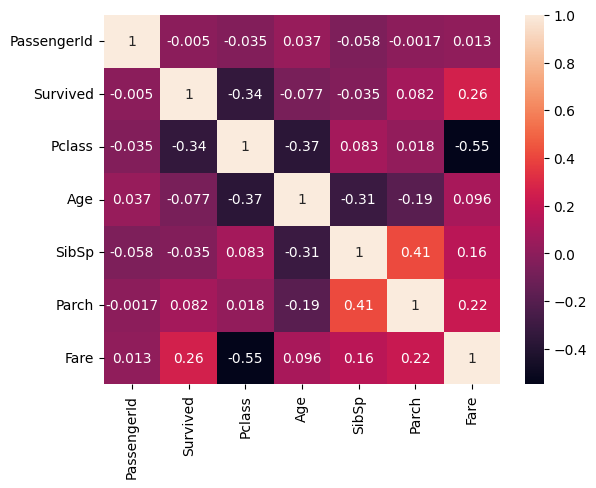

In [40]:
sns.heatmap(train.select_dtypes(np.number).corr(), annot = True)

In [41]:
X.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin',
       'Embarked'],
      dtype='object')

In [42]:
y.name

'Survived'

In [43]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
categorical_features = ['Sex', 'SibSp', 'Embarked']
numerical_features = ['Pclass', 'Age', 'Parch']

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
numerical_transformer =  Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
    ]
)


categorical_transformer = Pipeline(
    steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder())
    ]
)

In [47]:
preprocess = ColumnTransformer(
    transformers=[
        ("num_transform", numerical_transformer, numerical_features),
        ("cat_transform", categorical_transformer, categorical_features )

    ]
)

In [48]:
preprocess

ColumnTransformer(transformers=[('num_transform',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Pclass', 'Age', 'Parch']),
                                ('cat_transform',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot', OneHotEncoder())]),
                                 ['Sex', 'SibSp', 'Embarked'])])

In [49]:
model_prepocess = Pipeline(
    steps = [
    ('preprocess',preprocess),
    ('model',LogisticRegression())
    ]
)

In [50]:
model_prepocess.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Age', 'Parch']),
                                                 ('cat_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'SibSp',
                                                   'Embarked'])])),
                ('model', LogisticRegression())])

In [51]:
train_pred = model_prepocess.predict(train_X)

In [52]:
model_prepocess.predict_proba(train_X)

array([[0.6839784 , 0.3160216 ],
       [0.74777405, 0.25222595],
       [0.91394466, 0.08605534],
       ...,
       [0.937045  , 0.062955  ],
       [0.063057  , 0.936943  ],
       [0.54125712, 0.45874288]])

In [53]:
test_pred = model_prepocess.predict(test_X)

In [54]:
print("Train Accuracy:", model_prepocess.score(train_X, train_y))
print("Test Accuracy :", accuracy_score(test_y, test_pred))
print('-----------------------------')
print(classification_report(test_y, test_pred))

Train Accuracy: 0.8075842696629213
Test Accuracy : 0.8156424581005587
-----------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [55]:

print(confusion_matrix(test_y, test_pred))

[[91 14]
 [19 55]]


In [56]:
test_pred = model_prepocess.predict(test_X)

In [57]:
test_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [58]:
submission = pd.DataFrame({'PassengerId': train.loc[test_X.index, 'PassengerId'], 'Survived': test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
